In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import json

In [16]:
df = pd.read_csv("../data/errors.csv")

In [17]:
df.head()

,code,date,instance,message,path,payload
0,400,25/1/2023 00:06:48.268,consultas,No se han encontrado resultados,api/v1/consultas/norma/totales,"{ ""esReformado"" : false, ""search"" : ""lodep"", ""..."
1,400,2/11/2023 01:57:26.855,consultas,No se han encontrado resultados,api/v1/consultas/norma/totales,"{ ""esReformado"" : false, ""search"" : ""lodep"", ""..."
2,400,15/1/2023 09:08:41.329,consultas,No se han encontrado resultados,api/v1/consultas/norma/totales,"{ ""esReformado"" : false, ""search"" : ""lodep"", ""..."
3,400,13/11/2023 02:42:02.388,consultas,No se han encontrado resultados,api/v1/consultas/norma/totales,"{ ""esReformado"" : false, ""search"" : ""lodep"", ""..."
4,400,26/12/2023 12:24:50.872,consultas,No se han encontrado resultados,api/v1/consultas/norma/totales,"{ ""esReformado"" : false, ""search"" : ""lodep"", ""..."


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11003 entries, 0 to 11002
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   code      11003 non-null  int64 
 1   date      11003 non-null  object
 2   instance  11003 non-null  object
 3   message   11003 non-null  object
 4   path      11003 non-null  object
 5   payload   4130 non-null   object
dtypes: int64(1), object(5)
memory usage: 515.9+ KB


In [24]:
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y %H:%M:%S.%f", errors='coerce')

In [25]:
df.groupby('code').apply(lambda x: x.isnull().sum())

,code,date,instance,message,path,payload
code,,,,,,
400,0,7,0,0,0,3488
401,0,3,0,0,0,2948
403,0,3,0,0,0,437


In [37]:
df_cleaned = df.dropna(subset=['date'])

In [38]:
df_cleaned.groupby('code').apply(lambda x: x.isnull().sum())

,code,date,instance,message,path,payload
code,,,,,,
400,0,0,0,0,0,3486
401,0,0,0,0,0,2945
403,0,0,0,0,0,437


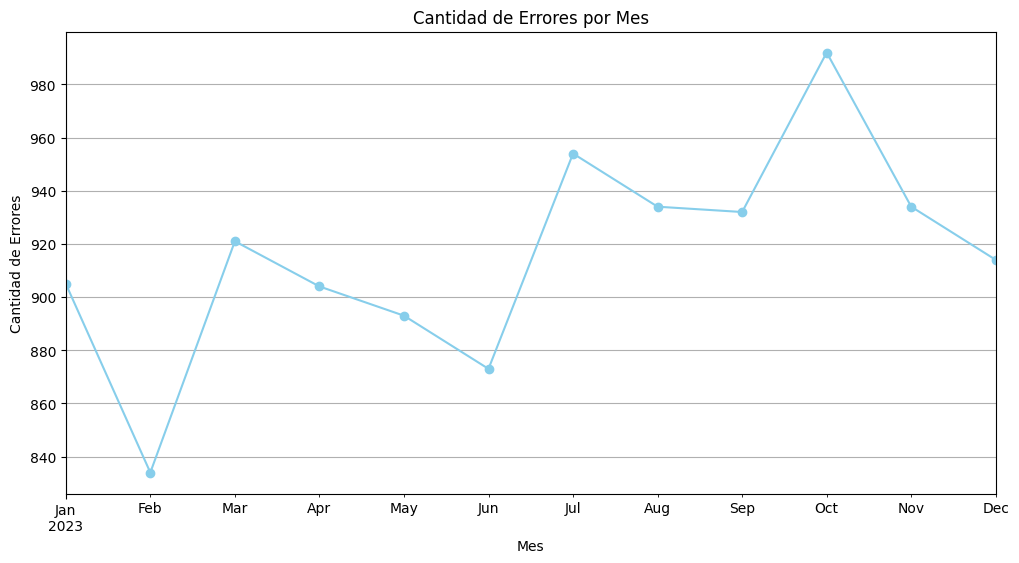

In [48]:
# Agrupar por mes y contar la cantidad de errores
errors_by_month = df_cleaned.groupby(df_cleaned['date'].dt.to_period("M")).size()

# Graficar la cantidad de errores por mes
plt.figure(figsize=(12, 6))
errors_by_month.plot(kind='line', marker='o', linestyle='-', color='skyblue')
plt.title('Cantidad de Errores por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Errores')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

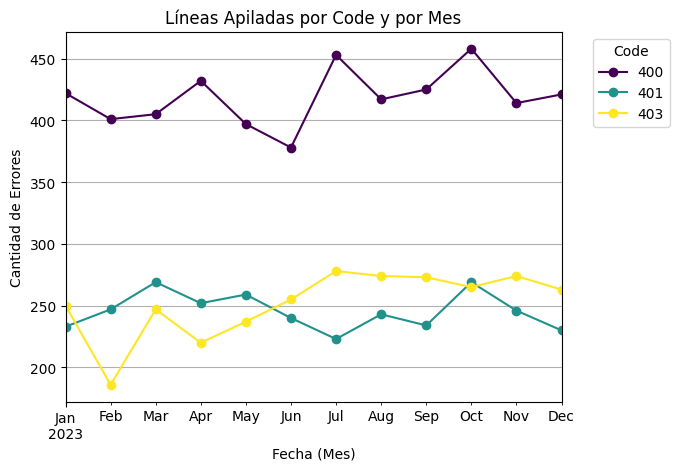

In [47]:
# Agrupar por mes y contar la cantidad de errores
errors_by_month = df_cleaned.groupby([df_cleaned['date'].dt.to_period("M"), 'code']).size().reset_index(name='count')

# Pivotear el DataFrame para tener 'code' como columnas
pivot_errors = errors_by_month.pivot(index='date', columns='code', values='count').fillna(0)

# Graficar las líneas apiladas por código
plt.figure(figsize=(12, 6))
pivot_errors.plot(kind='line', marker='o', linestyle='-', cmap='viridis')
plt.title('Líneas Apiladas por Code y por Mes')
plt.xlabel('Fecha (Mes)')
plt.ylabel('Cantidad de Errores')
plt.legend(title='Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

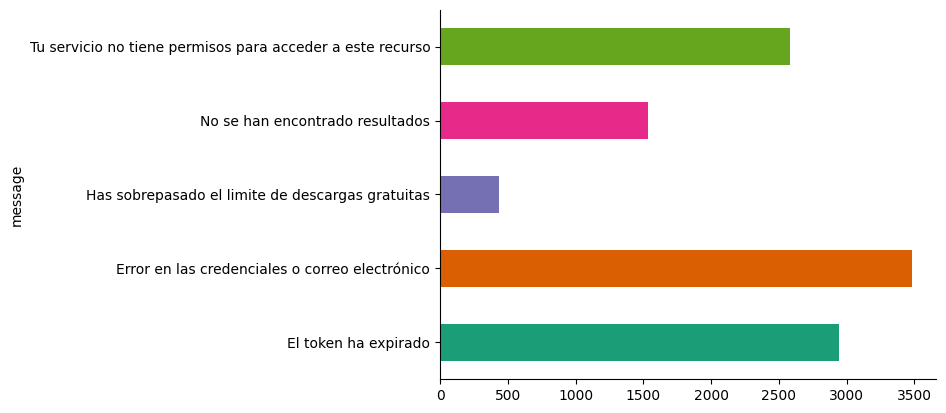

In [52]:
df_cleaned.groupby('message').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

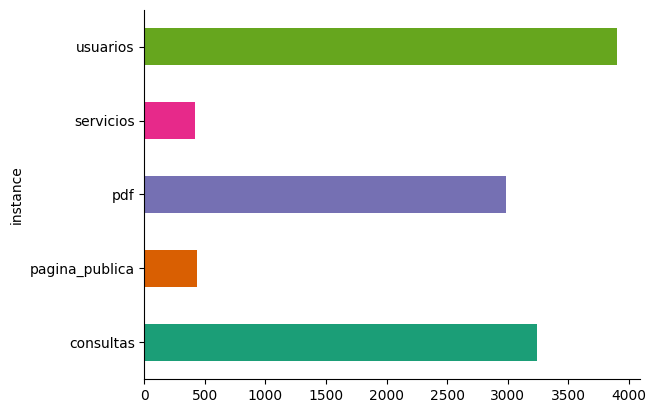

In [51]:
df_cleaned.groupby('instance').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

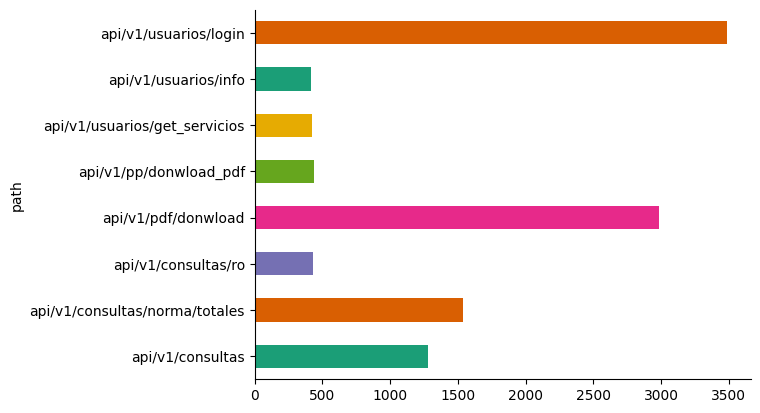

In [53]:
df_cleaned.groupby('path').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

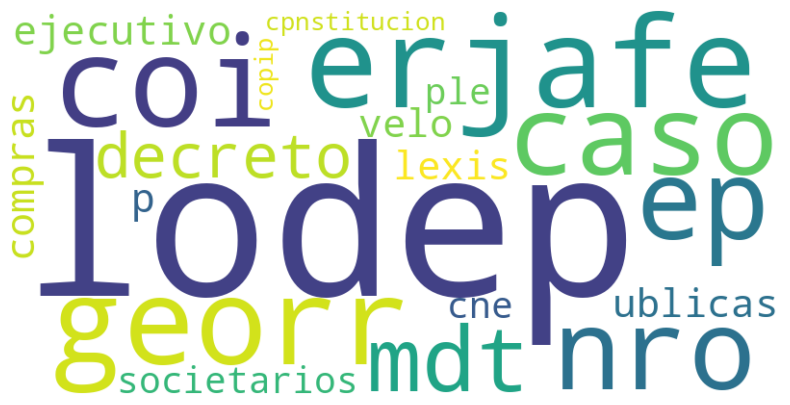

In [59]:
# Filtrar por código 400 y extraer valores de 'search'
filtered_data = df_cleaned[df_cleaned['code'] == 400]['payload']
search_values = filtered_data.apply(lambda x: json.loads(x)['search'].lower() if pd.notnull(x) else '').tolist()

# Eliminar duplicados y unir los valores de 'search' en una cadena
unique_text_data = ' '.join(set(search_values))

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(unique_text_data)

# Mostrar la nube de palabras usando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Oculta los ejes
plt.show()

In [64]:
df_cleaned.to_parquet('../data/df_cleaned.parquet', index=False)

In [65]:
data = pd.read_parquet('../data/df_cleaned.parquet')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10990 entries, 0 to 10989
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   code      10990 non-null  int64         
 1   date      10990 non-null  datetime64[ns]
 2   instance  10990 non-null  object        
 3   message   10990 non-null  object        
 4   path      10990 non-null  object        
 5   payload   4122 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 515.3+ KB
